## BT6270: Computational Neuroscience
### Ayush Mukund Jamdar EE20B018

Here, we model coupled Hopf Oscillators and calculate coupling coefficients to achieve a given phase difference.

In [311]:
import numpy as np
import matplotlib.pyplot as plt

#### A. Complex Coupling
Phase differences to be achieved - 
1. $-47^{\degree}$
2. $98^{\degree}$

Oscillator frequencies - 
$\omega _1 = \omega _2 = 5$

In [354]:
def complex_coupling(t_sim, phase_diff, magnitude, omega_1, omega_2):
    """
    Phase Difference is in Degrees
    """
    mu = 1
    dt = 0.01
    time_sampled = np.arange(0, t_sim, dt)

    # initialize r and theta for both oscillators
    r_1 = np.zeros(len(time_sampled))
    r_2 = np.zeros(len(time_sampled))
    theta_1 = np.zeros(len(time_sampled))
    theta_2 = np.zeros(len(time_sampled))

    r_1[0] = np.random.uniform(0, 1)
    r_2[0] = np.random.uniform(0, 1) # to avoid 0/0

    theta_1[0] = np.random.uniform(0, 1) * 360
    theta_2[0] = np.random.uniform(0, 1) * 360

    # forward Euler method
    for t in range(1, len(time_sampled)):
        r_1_dot = (mu - r_1[t-1]**2) * r_1[t-1] + magnitude * r_2[t-1] * np.cos(np.deg2rad(theta_2[t-1] - theta_1[t-1] + phase_diff))
        r_2_dot = (mu - r_2[t-1]**2) * r_2[t-1] + magnitude * r_1[t-1] * np.cos(np.deg2rad(theta_1[t-1] - theta_2[t-1] - phase_diff))
        theta_1_dot = omega_1 + magnitude * np.sin(np.deg2rad(theta_2[t-1] - theta_1[t-1] + phase_diff)) * (r_2[t-1] / r_1[t-1])
        theta_2_dot = omega_2 + magnitude * np.sin(np.deg2rad(theta_1[t-1] - theta_2[t-1] - phase_diff)) * (r_1[t-1] / r_2[t-1])

        # r_1[t] = max(r_1[t-1] + r_1_dot * dt, 0)
        # r_2[t] = max(r_2[t-1] + r_2_dot * dt, 0)

        if r_1[t-1] + r_1_dot * dt < 0:
            r_1[t] = r_1[t-1]
        else:
            r_1[t] = r_1[t-1] + r_1_dot * dt

        if r_2[t-1] + r_2_dot * dt < 0:
            r_2[t] = r_2[t-1]
        else:
            r_2[t] = r_2[t-1] + r_2_dot * dt
        
        theta_1[t] = theta_1[t-1] + theta_1_dot * dt
        theta_2[t] = theta_2[t-1] + theta_2_dot * dt

    return time_sampled, r_1, r_2, theta_1, theta_2

In [359]:
def power_coupling(t_sim, phase_diff, magnitude, omega_1, omega_2):
    """
    Phase Difference is in Radians
    """
    mu = 1
    dt = 0.01
    time_sampled = np.arange(0, t_sim, dt)

    # initialize r and theta for both oscillators
    r_1 = np.zeros(len(time_sampled))
    r_2 = np.zeros(len(time_sampled))
    theta_1 = np.zeros(len(time_sampled))
    theta_2 = np.zeros(len(time_sampled))

    r_1[0] = np.random.uniform(0, 1)
    r_2[0] = np.random.uniform(0, 1) # to avoid 0/0

    theta_1[0] = np.random.uniform(0, 1) * 2 * np.pi
    theta_2[0] = np.random.uniform(0, 1) * 2 * np.pi

    # forward Euler method
    for t in range(1, len(time_sampled)):
        
        r_1_dot = (
                    mu - r_1[t-1]**2) * r_1[t-1] + \
                    magnitude * (r_2[t-1] ** (omega_1/omega_2)) * \
                    np.cos(omega_1 * ((theta_2[t-1] / omega_2) - \
                    (theta_1[t-1] / omega_1) + (phase_diff/(omega_1*omega_2)))
                )
        
        r_2_dot = (
                    mu - r_2[t-1]**2) * r_2[t-1] + \
                    magnitude * (r_1[t-1] ** (omega_2/omega_1)) * \
                    np.cos(omega_2 * ((theta_1[t-1] / omega_1) - \
                    (theta_2[t-1] / omega_2) - (phase_diff/(omega_1*omega_2)))
                )
        
        theta_1_dot = (
                    omega_1 + magnitude * \
                    np.sin(omega_1 * ((theta_2[t-1] / omega_2) - \
                    (theta_1[t-1] / omega_1) + (phase_diff/(omega_1*omega_2)))) * \
                    ((r_2[t-1] ** (omega_1/omega_2)) / r_1[t-1])
                )
        
        theta_2_dot = (
                    omega_2 + magnitude * \
                    np.sin(omega_2 * ((theta_1[t-1] / omega_1) - \
                    (theta_2[t-1] / omega_2) - (phase_diff/(omega_1*omega_2)))) * \
                    ((r_1[t-1] ** (omega_2/omega_1)) / r_2[t-1])
                )

        if r_1[t-1] + r_1_dot * dt < 0:
            r_1[t] = r_1[t-1]
        else:
            r_1[t] = r_1[t-1] + r_1_dot * dt

        if r_2[t-1] + r_2_dot * dt < 0:
            r_2[t] = r_2[t-1]
        else:
            r_2[t] = r_2[t-1] + r_2_dot * dt
            
        theta_1[t] = (theta_1[t-1] + theta_1_dot * dt)
        theta_2[t] = (theta_2[t-1] + theta_2_dot * dt)

    return time_sampled, r_1, r_2, theta_1, theta_2

In [320]:
def plot_coupling(time_sampled, r_1, r_2, theta_1, theta_2, phase_diff, omega_1, omega_2, type="complex"):
    fig, ax = plt.subplots(2, 1, figsize=(6, 6))
    if type == "complex":
        ax[0].plot(time_sampled, ((theta_1 - theta_2) - (phase_diff)) % 180)
        ax[0].set_title('Phase Difference (deg) - Target Phase Difference vs Time')
    elif type == "power":
        ax[0].plot(time_sampled, ((theta_1 /omega_1) - (theta_2/omega_2) - (phase_diff/(omega_1 * omega_2))))
        ax[0].set_title('Normalized PD (rad) - Target PD vs Time')
        
    ax[0].set_xlabel('Time')
    # ax[0].set_ylabel('Phase Difference in deg (calculated - target)')
    ax[0].grid()
    ax[1].plot(time_sampled, r_1*np.cos(theta_1), label='real(z1)')
    ax[1].plot(time_sampled, r_2*np.cos(theta_2), label='real(z2)')
    ax[1].set_xlabel('Time')
    ax[1].set_ylabel('Real(Z)')
    ax[1].set_title('Real(Z) vs Time')
    ax[1].set_xlim([0, 20])
    ax[1].grid()
    ax[1].legend()
    plt.tight_layout()
    plt.savefig('A3_complexcoupling.png')
    plt.show()

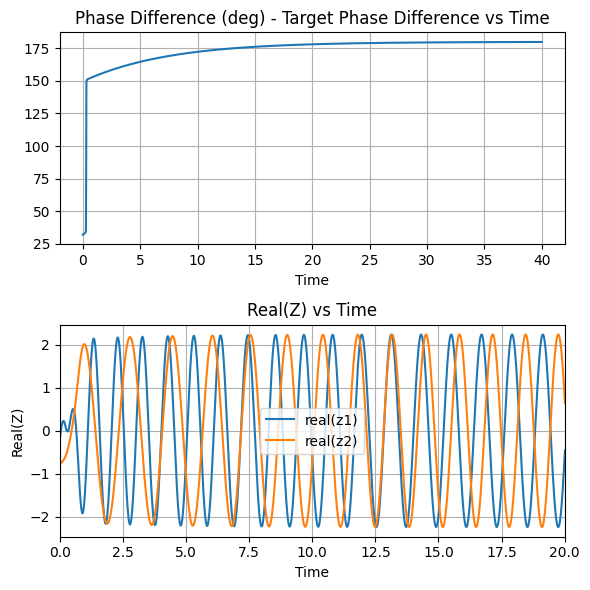

In [355]:
# A.1 Phase Difference = -47 degrees
# A = 0.5
weight_phase = -47
weight_mag = 4 # A
omega_1 = 5
omega_2 = 5
t_sim = 40
time_sampled, r_1, r_2, theta_1, theta_2 = complex_coupling(t_sim, weight_phase, weight_mag, omega_1, omega_2)

# plot  two data in subplots
plot_coupling(time_sampled, r_1, r_2, theta_1, theta_2, weight_phase, omega_1, omega_2, type="complex")

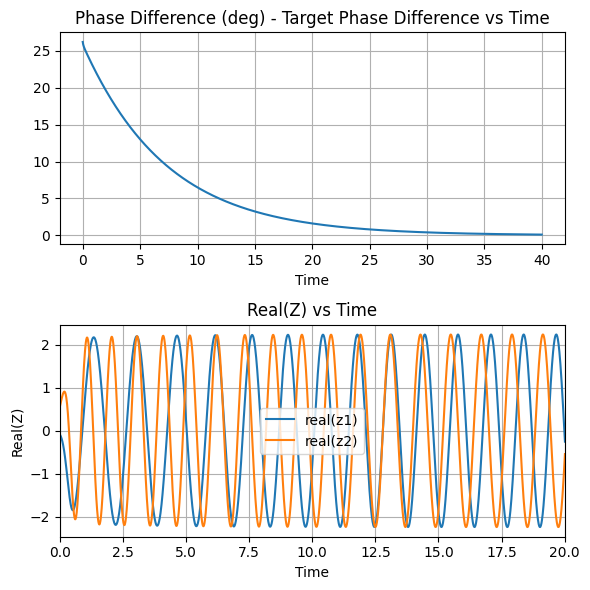

In [357]:
# A.2 Phase Difference = +98 degrees
A = 0.5
weight_phase = 98
weight_mag = 4 # A
omega_1 = 5
omega_2 = 5
t_sim = 40

time_sampled, r_1, r_2, theta_1, theta_2 = complex_coupling(t_sim, weight_phase, weight_mag, omega_1, omega_2)

# plot  two data in subplots
plot_coupling(time_sampled, r_1, r_2, theta_1, theta_2, weight_phase, omega_1, omega_2, type="complex")

#### A. Power Coupling
Phase differences (normalized) to be achieved - 
1. $-47^{\degree}$
2. $98^{\degree}$

Oscillator frequencies - 
$\omega _1 = 5$  $\omega _2 = 15$

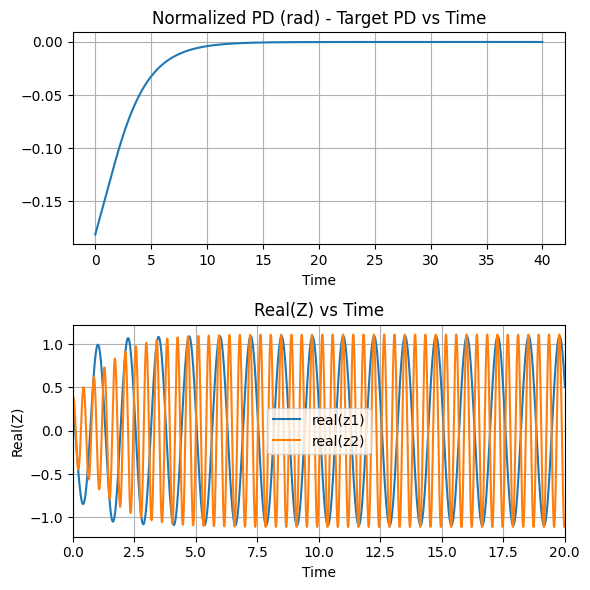

In [362]:
# B.1 Phase Difference = -47 degrees
weight_phase_b = -47*(np.pi/180)
weight_mag_b = 0.2 # A
omega_1_b = 5
omega_2_b = 15
t_sim_b = 40

time_sampled, r_1, r_2, theta_1, theta_2 = power_coupling(t_sim_b, weight_phase_b, weight_mag_b, omega_1_b, omega_2_b)
# plot  two data in subplots
plot_coupling(time_sampled, r_1, r_2, theta_1, theta_2, weight_phase_b, omega_1_b, omega_2_b, type="power")

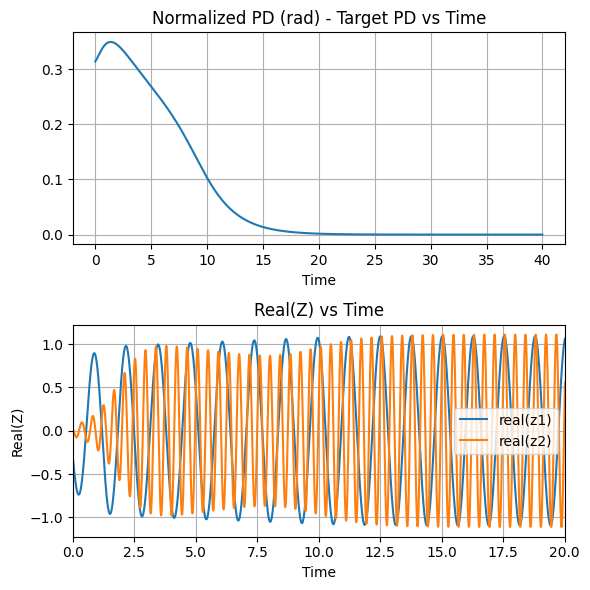

In [365]:
# B.2 Phase Difference = +98 degrees
weight_phase_b = 98*(np.pi/180)
weight_mag_b = 0.2 # A
omega_1_b = 5
omega_2_b = 15
t_sim_b = 40

time_sampled, r_1, r_2, theta_1, theta_2 = power_coupling(t_sim_b, weight_phase_b, weight_mag_b, omega_1_b, omega_2_b)

# plot  two data in subplots
plot_coupling(time_sampled, r_1, r_2, theta_1, theta_2, weight_phase_b, omega_1_b, omega_2_b, type="power")